# Density vs Coordinate Plots from .h5

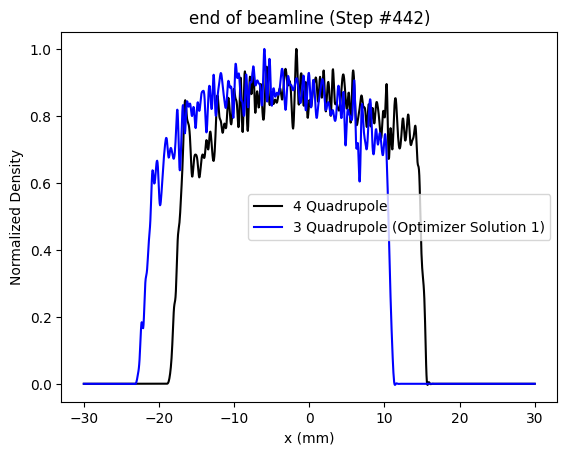

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import interp1d

def get_density_data(parent_dir, filename):
    # Read data from file
    with h5py.File(parent_dir+filename, 'r+') as dataopal:
        # assuming you are using the same step for both files
        step = 442 # 442 is the final step, you can view earlier steps if desired
        stepdirx = 'Step#'+str(step)+'/x'
        x = dataopal.get(stepdirx)
        X = np.array(x)*1e3

        # Grid size
        grid_z = 30
        nbins = 251

        # Mesh range for plotting
        Xedges =  np.linspace(-grid_z, grid_z, nbins)
        H, xedges = np.histogram(X, bins=Xedges)

        # Normalization
        H1 = H / max(H)

        # Mesh range for interpolating
        Xedgesi =  xedges[:-1] # The edges are one element longer than the histogram

        # 1D Interpolation processing for histogram
        f = interp1d(Xedgesi, H1, kind='cubic', fill_value="extrapolate")

        # New edges for interpolated data
        Xedgesnew = np.linspace(-grid_z, grid_z, nbins*5)
        H_interpolated = f(Xedgesnew)

        # Normalization
        H1_interpolated = H_interpolated / max(H_interpolated)
        x_h = np.linspace(-grid_z, grid_z, len(Xedgesnew))

        return x_h, H1_interpolated

# Parent directory
parent_dir = "A:/PBPL/"

# File names, what .h5 data files to get plots from
filenames = ["1deg_input.h5", "3QuadOptim.h5"]

# Colors and labels for each file
colors = ["black", "blue"]
labels = ["4 Quadrupole", "3 Quadrupole (Optimizer Solution 1)"]

# Call the function for each input file
data = [get_density_data(parent_dir, fn) for fn in filenames]

# Plot the densities for each file
for i, (x_h, histx) in enumerate(data):
    plt.plot(x_h, histx, '-', color=colors[i], label=labels[i])

plt.xlabel('x (mm)')
plt.ylabel('Normalized Density')
plt.title('end of beamline (Step #442)')
plt.legend()
plt.show()

# Z Proj Plot

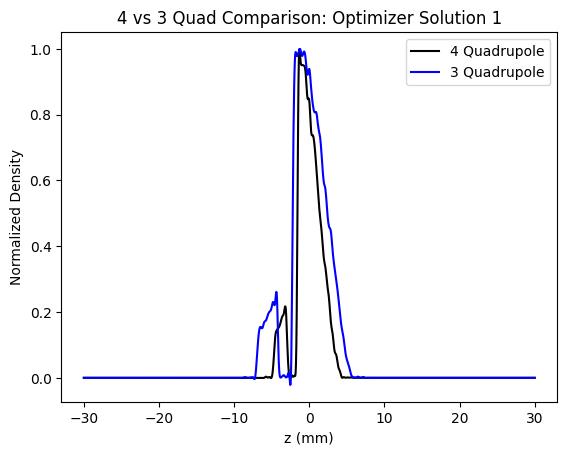

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import interp1d

def get_density_data(parent_dir, filename):
    # Read data from file
    with h5py.File(parent_dir + filename, 'r+') as dataopal:
        # Assuming you are using the same step for both files
        step = 442
        stepdirz = 'Step#' + str(step) + '/z'  # Change to z data
        z = dataopal.get(stepdirz)  # Fetch z data
        Z = np.array(z) * 1e3  # Assuming z data needs similar conversion as x

        # Grid size and number of bins
        grid_z = 30
        nbins = 251

        # Mesh range for plotting
        Zedges = np.linspace(-grid_z, grid_z, nbins)
        H, zedges = np.histogram(Z, bins=Zedges)

        # Normalization
        H1 = H / max(H)

        # Mesh range for interpolating
        Zedgesi = zedges[:-1]  # The edges are one element longer than the histogram

        # 1D Interpolation processing for histogram
        f = interp1d(Zedgesi, H1, kind='cubic', fill_value="extrapolate")

        # New edges for interpolated data
        Zedgesnew = np.linspace(-grid_z, grid_z, nbins * 5)
        H_interpolated = f(Zedgesnew)

        # Normalization
        H1_interpolated = H_interpolated / max(H_interpolated)
        z_h = np.linspace(-grid_z, grid_z, len(Zedgesnew))

        return z_h, H1_interpolated

# Parent directory
parent_dir = "A:/PBPL/"

# File names
filenames = ["1deg_input.h5", "3QuadOptim.h5"]

# Colors and labels for each file
colors = ["black", "blue"]
labels = ["4 Quadrupole", "3 Quadrupole"]

# Call the function for each input file
data = [get_density_data(parent_dir, fn) for fn in filenames]

# Plot the densities for each file
for i, (z_h, histz) in enumerate(data):
    plt.plot(z_h, histz, '-', color=colors[i], label=labels[i])

plt.xlabel('z (mm)')  # Change label to z
plt.ylabel('Normalized Density')
plt.title('4 vs 3 Quad Comparison: Optimizer Solution 1')
plt.legend()
plt.show()